<a href="https://colab.research.google.com/github/El-Onah/IamOnah/blob/main/Copy_of_Pan_Card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
from bs4 import BeautifulSoup
import requests


In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [ ]:
#open image and display
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)

In [ ]:
#the file format of the source code
print("Original image format : ", original.format)
print("Tampered image format : ", tampered.format)

# Image size,, in pixels, the size is given as a 2-tuple (width, height)
print("Original image size : ", original.size)
print("Tampered image size : ", tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [ ]:
#resize image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') #Saves Image

tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') # Saves Tampered


(250, 160)
(250, 160)


In [ ]:
# change image type if required form png to jpg
tampered = Image.open("pan_card_tampering/image/tampered.png")
tampered.save ("pan_card_tampering/image/tampered.png") #can do to jpg


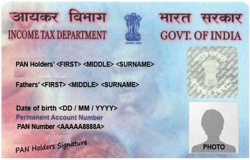

In [ ]:
#Display original image
original


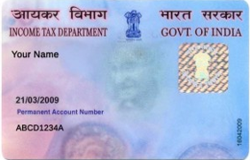

In [ ]:
tampered


In [ ]:
#load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
#convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
# compute the structural similarity index(SSIM) between the two images, ensuring that the difference image is retured
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print('SSIM: {}'.format(score))

SSIM: 0.31678790332739426


In [ ]:
#calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:

#loop over the contours
for c in cnts:
  #applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + y, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + y, y + h), (0, 0, 255), 2)

Original Format Image


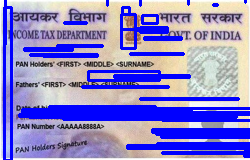

In [ ]:
#Display original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


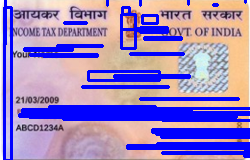

In [ ]:
#Display original image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


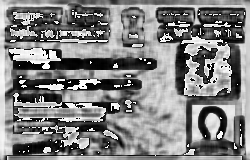

In [ ]:
#display dfference in black
print("Different Image")
Image.fromarray(diff)

Different Image


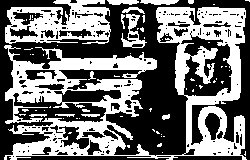

In [ ]:
#display dfference in black
print("Different Image")
Image.fromarray(thresh)